In [9]:
# We import relevant modules to use 
import numpy as np
import pandas as pd
import plotly.express as px

# Question 1

## Comparing the number of overall crime offences with the number of sexual offences’ per London borough

In [10]:
# Sub-Research Question 1 

# Download the data for the overall recorded crime offences 
path = 'data/ORO.csv'
df1 = pd.read_csv(path)
df1.head(5)

,Borough,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Barking and Dagenham,"19,567","20,253","20,538","20,394","22,144","21,442","22,062","21,384","19,536","19,987","19,843","19,177","18,825","17,240","16,104","16,235","17,477","14,638"
2,Barnet,"30,708","30,213","32,274","34,338","36,288","37,887","34,871","29,920","26,645","26,374","26,273","25,701","26,281","25,364","22,724","23,192","24,978","21,549"
3,Bexley,"20,680","21,072","21,200","19,752","20,344","18,859","20,011","16,997","16,811","16,171","15,451","13,739","12,168","12,335","11,837","12,280","12,644","11,163"
4,Brent,"33,253","32,513","33,276","33,537","35,837","35,582","35,140","30,474","28,126","27,213","29,046","29,492","31,592","27,260","24,476","25,101","26,128","23,237"


In [11]:
# Cleaning the data

# Deleting "NaN" rows 
df1 = df1.drop(0)
df1.head(5)

,Borough,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
1,Barking and Dagenham,"19,567","20,253","20,538","20,394","22,144","21,442","22,062","21,384","19,536","19,987","19,843","19,177","18,825","17,240","16,104","16,235","17,477","14,638"
2,Barnet,"30,708","30,213","32,274","34,338","36,288","37,887","34,871","29,920","26,645","26,374","26,273","25,701","26,281","25,364","22,724","23,192","24,978","21,549"
3,Bexley,"20,680","21,072","21,200","19,752","20,344","18,859","20,011","16,997","16,811","16,171","15,451","13,739","12,168","12,335","11,837","12,280","12,644","11,163"
4,Brent,"33,253","32,513","33,276","33,537","35,837","35,582","35,140","30,474","28,126","27,213","29,046","29,492","31,592","27,260","24,476","25,101","26,128","23,237"
5,Bromley,"26,474","26,142","28,638","30,276","30,918","30,761","30,793","28,424","25,195","26,350","23,781","22,031","21,903","20,248","19,445","20,434","21,137","17,243"


In [12]:
# Download the data for the overall recorded sexual offences
path2 = 'data/OSO.csv'
df2 = pd.read_csv(path2)
df2.head(5)

,Borough,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Barking and Dagenham,186,210,211,251,235,244,258,263,288,205,267,262,275,258,300,403,413,396
2,Barnet,244,220,245,292,266,379,309,301,269,247,318,303,297,300,356,429,482,464
3,Bexley,155,189,222,204,159,255,199,181,153,137,177,175,169,178,247,278,298,318
4,Brent,337,339,334,287,374,298,319,336,343,287,313,341,341,379,366,489,527,500


In [13]:
# Cleaning the data

# Deleting "NaN" rows 
df2 = df2.drop(0)
df2.head(5)

,Borough,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
1,Barking and Dagenham,186,210,211,251,235,244,258,263,288,205,267,262,275,258,300,403,413,396
2,Barnet,244,220,245,292,266,379,309,301,269,247,318,303,297,300,356,429,482,464
3,Bexley,155,189,222,204,159,255,199,181,153,137,177,175,169,178,247,278,298,318
4,Brent,337,339,334,287,374,298,319,336,343,287,313,341,341,379,366,489,527,500
5,Bromley,166,186,232,240,233,308,293,261,244,225,280,241,256,239,310,394,413,381


In [14]:
# Before visualising the data we first create a function to modify directly a dataframe

def modif(df):
    # We want index to be the year
    dates = [day[:4] for day in df.columns[1:]] # we throw away the '-xx' to make a real year
    # We change the columns names which are numbers, into the boroughs names
    df_bis = np.transpose(df[df.columns[1:]]).rename(columns=df.Borough) 
    df_bis.index = dates
    
    # We browse the data to change format 'xxx,xx' into xxx.xx
    for date in dates:
        for borough in df_bis.columns:
            df_bis.loc[date][borough] = int(df_bis.loc[date][borough].replace(',',''))
    return df_bis

# Showing it works
modif(df1)

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Heathrow,Inner London,Outer London
1999,19567,30708,20680,33253,26474,45800,37743,38737,28588,29991,...,15504,43734,14493,34071,27035,35527,87615,6717,537810,471689
2000,20253,30213,21072,32513,26142,46778,35221,38572,28019,28165,...,14683,40447,13938,35070,25771,34756,83379,6490,523929,463187
2001,20538,32274,21200,33276,28638,53103,37450,39128,29401,28995,...,16057,45707,15359,37273,30260,35717,86270,6371,558919,491223
2002,20394,34338,19752,33537,30276,53890,38618,40147,30042,31202,...,16814,45960,14987,41124,32264,36204,86151,6323,567070,506484
2003,22144,36288,20344,35837,30918,51016,37043,37927,29998,31347,...,15446,46276,16154,39188,30912,33567,79296,6071,546653,508203
2004,21442,37887,18859,35582,30761,45432,35004,36418,28131,31186,...,15320,43771,16942,36329,29491,31641,79338,6168,517540,491413
2005,22062,34871,20011,35140,30793,42236,34859,37295,27473,31354,...,14891,41432,16077,33756,30143,30130,71582,6024,491150,486951
2006,21384,29920,16997,30474,28424,42435,31510,36734,27058,29829,...,13408,39713,15408,32627,28927,30039,66267,5053,464361,452365
2007,19536,26645,16811,28126,25195,35398,30587,33963,25275,30617,...,12073,40029,13340,30892,25751,27299,63934,4402,438570,419060
2008,19987,26374,16171,27213,26350,34175,32789,32747,24533,28677,...,11885,39266,13831,27710,26240,25088,63331,3817,421210,419884


In [20]:
# Analysing and visualising the data 

# We want to plot 3 graphs:
# 1. The mean of overall crime offences over time (in years) - interactive line plot
# 2. The mean of overall recorded sexual offences over time (in years) - interactive line plot
# 3. The number of all London Boroughs of overall crime offences and overall recorded sexual offences over time (in years) - interactive bar chart

# For the graph 1. we plot an interactive line plot
# x-axis: time (in years)
# y-axis: mean of all London Boroughs of the number of overall crime offences

# Now we calculate the mean of overall crime offences for all London boroughs 


df1_bis = modif(df1)
columns = df1_bis.columns[:-2] # We disregard the last two columns, ie. 'Inner London' and 'Outer London'
df1_bis['Sum'] = sum(df1_bis[borough] for borough in columns)/len(columns)



year=[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

#Creation of a column with the sum and years in df2_bis to plot the graphs

df1_bis['Sum'] = sum(df1_bis[borough] for borough in columns)/len(columns)

df1_bis['Year']= year




#creation of line plot 

fig = px.line(df1_bis,x='Year',y='Sum',
                 title = "Mean of overall crime offences between 1999 and 2017 in London boroughs")

fig.show()

fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Mean of overall crime offences between 1999 and 2017 in London boroughs.html')




In [21]:
# Before visualising the data we apply our 'modif' function to df2
modif(df2)

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Heathrow,Inner London,Outer London
1999,186,244,155,337,166,295,302,360,221,349,...,134,455,128,318,247,278,633,22,4820,4063
2000,210,220,189,339,186,318,392,344,256,343,...,94,444,97,383,247,291,517,22,4647,4082
2001,211,245,222,334,232,416,384,342,296,361,...,112,438,115,347,297,364,772,33,5322,4569
2002,251,292,204,287,240,353,427,359,299,369,...,104,457,135,449,288,368,702,22,5679,4709
2003,235,266,159,374,233,425,384,355,311,382,...,101,500,135,372,269,344,688,20,5550,4630
2004,244,379,255,298,308,535,411,388,247,352,...,174,479,170,410,239,333,772,33,5776,5055
2005,258,309,199,319,293,459,352,326,293,370,...,139,457,190,401,278,328,738,29,5396,4868
2006,263,301,181,336,261,339,354,319,241,361,...,129,455,139,403,240,342,572,36,4735,4534
2007,288,269,153,343,244,240,372,307,246,324,...,149,347,154,354,214,343,554,28,4306,4432
2008,205,247,137,287,225,197,397,314,252,317,...,118,415,188,308,229,336,552,40,4367,4332


In [22]:
# For the graph 2. we also plot an interactive line plot
# x-axis: time (in years)
# y-axis: mean of overall recorded sexual offences 

# We do the same for the overall recorded sexual offences and calculate the mean of overall recorded sexual offences for all London boroughs

df2_bis = modif(df2)
columns = df2_bis.columns[:-2] # We disregard the last two columns, ie. 'Inner London' and 'Outer London'



year=[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

#Creation of a column with the sum and years in df2_bis to plot the graphs

df2_bis['Sum'] = sum(df2_bis[borough] for borough in columns)/len(columns)

df2_bis['Year']= year




#creation of line plot 

fig = px.line(df1_bis,x='Year',y='Sum',
                 title = "Mean of recorded sexual offences between 1999 and 2017 in London boroughs")

fig.show()

fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Mean of recorded sexual offences between 1999 and 2017 in London boroughs.html')



<IPython.core.display.Javascript object>


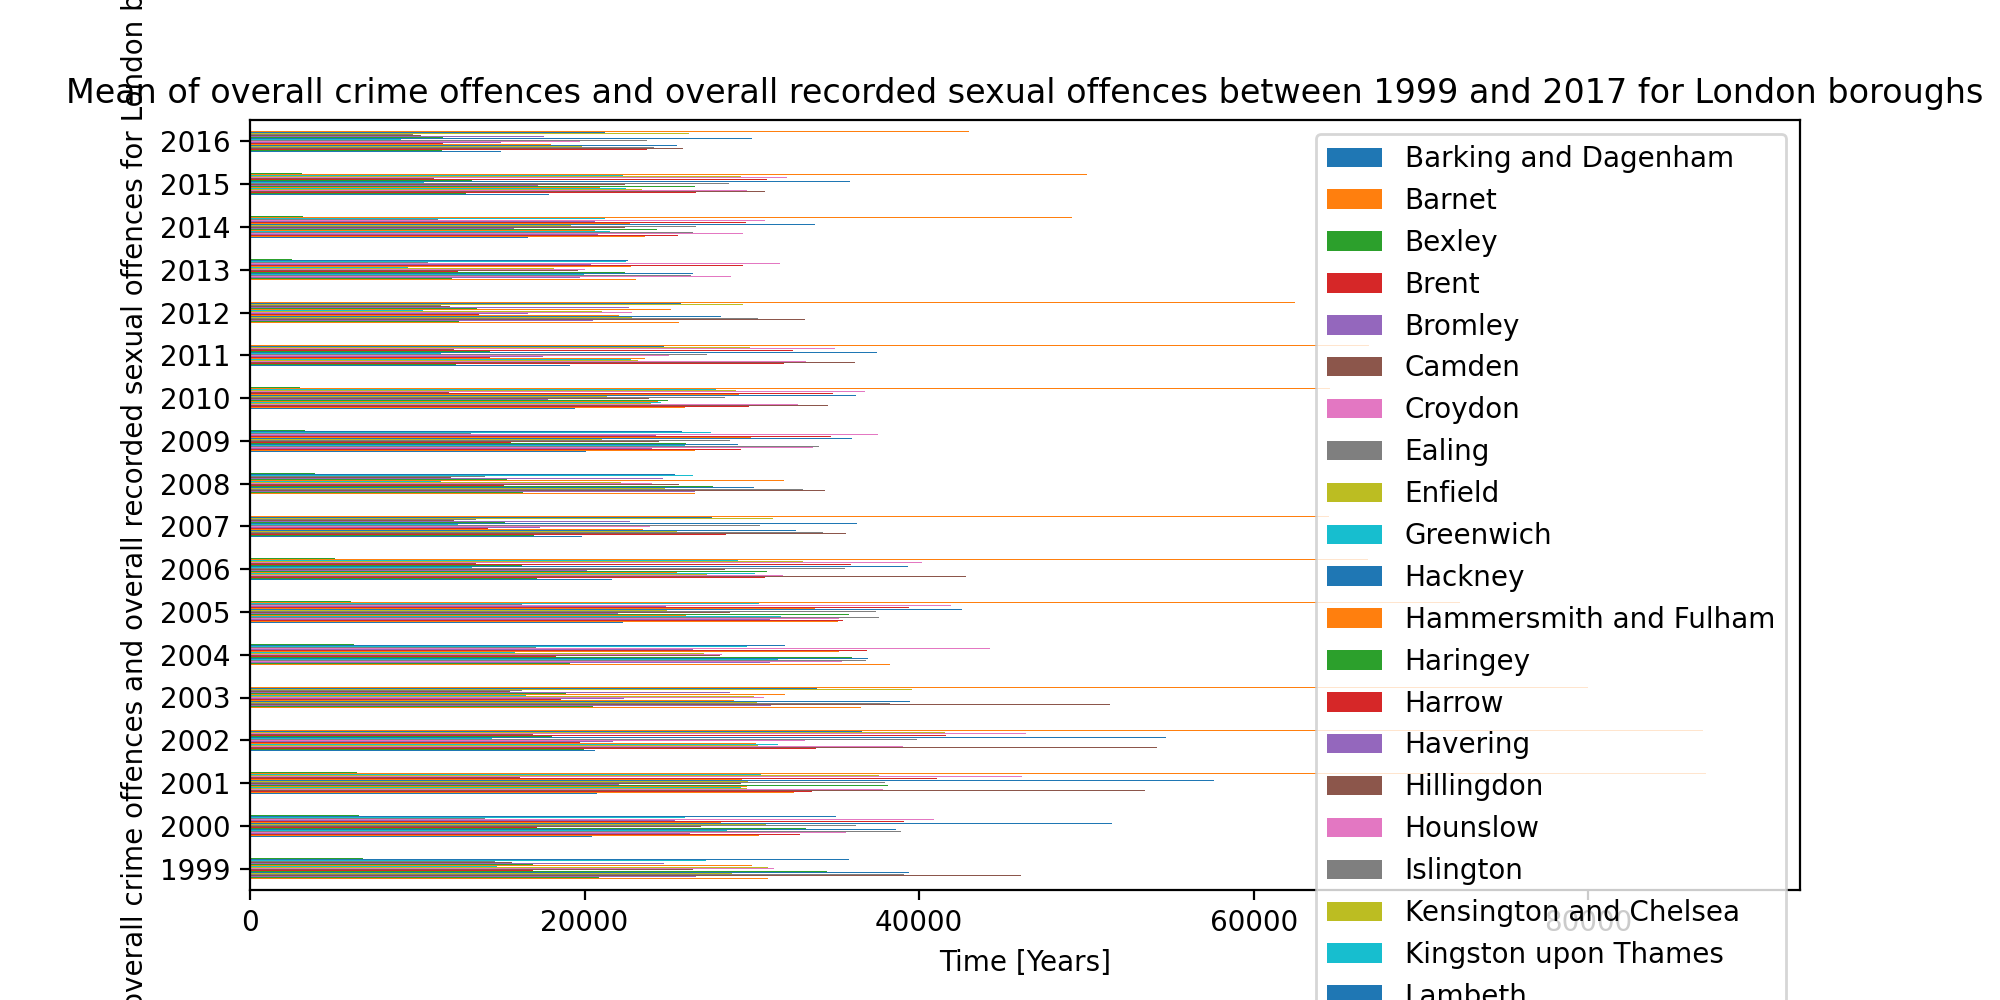

In [11]:
# For the graph 3. we also plot an interactive bar chart
# x-axis: time (in years)
# y-axis: mean of overall crime offences and overall recorded sexual offences per year

# Needs to be done - mean AND INTERACTIVE bar chart
# Problem here: I would like a bar chart with the mean of overall crime offences 
# and overall recorded sexual offences for London boroughs per year 

(modif(df1) + modif(df2))[modif(df1).columns[:-2]].plot(kind='barh', figsize=(10,5))


df1_bis['Sum2']=df2_bis['Sum']

# We label our interactive line plot (x, y axes and graph)
plt.xlabel('Time [Years]')
plt.ylabel('Mean of overall crime offences and overall recorded sexual offences for London boroughs')
plt.title('Mean of overall crime offences and overall recorded sexual offences between 1999 and 2017 for London boroughs')


#Create bar chart

fig = px.bar(df, y="Proportion of each offence recorded as 'alcohol-related'", x='Offence description', 
             text="Proportion of each offence recorded as 'alcohol-related'")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

## Comparing the Violence Against Woman and Girls types of assaults across England and Wales 

In [23]:
# Dataset i.a
# Download Data for prevalence of sexual assault among adults aged 16 to 74
# By type of sexual assault and sex, year ending March 2020 (in the last year and since the age of 16)
path5 = 'data/PSA.csv'
df5 = pd.read_csv(path5)
df5

,Unnamed: 0,Since the age of 16,Unnamed: 2,Unnamed: 3,Unnamed: 4,In the last year,Unnamed: 6,Unnamed: 7
0,NaN,Men,Women,All,NaN,Men,Women,All
1,NaN,Percentage who were victims once or more,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Any sexual assault (including attempts)3,4.7,22.9,13.9,NaN,0.7,2.9,1.8
4,Rape or assault by penetration (including atte...,0.5,7.1,3.8,NaN,0.1,0.8,0.5
5,Rape or assault by penetration (excluding atte...,0.4,6.0,3.2,NaN,0.0,0.6,0.3
6,- Rape including attempts,0.4,6.2,3.3,NaN,0.0,0.6,0.3
7,- Rape excluding attempts,0.3,5.1,2.7,NaN,0.0,0.4,0.2
8,- Assault by penetration including attempts,0.3,4.8,2.5,NaN,0.0,0.5,0.3
9,- Assault by penetration excluding attempts,0.2,3.6,1.9,NaN,0.0,0.3,0.2


In [24]:
# Cleaning the data 

# We delete the columns that don't interest us, ie. those that analyse men prevalence and men and women prevalence
df5.pop('Unnamed: 7')
df5.pop('Unnamed: 3')
df5.pop('Unnamed: 4')
df5.pop('Since the age of 16')
df5.pop('In the last year')

# We then rename the columns for clarity
df5.rename(columns={"Unnamed: 0": "Types of offences", "Unnamed: 2": "Since the age of 16", "Unnamed: 6": "In the last year"}, inplace = True)

# Deleting "NaN" rows  
df5 = df5.drop(0, axis=0)
df5 = df5.drop(1, axis=0)
df5 = df5.drop(2, axis=0)
 
# We view the cleaned and finalized table 
df5

,Types of offences,Since the age of 16,In the last year
3,Any sexual assault (including attempts)3,22.9,2.9
4,Rape or assault by penetration (including atte...,7.1,0.8
5,Rape or assault by penetration (excluding atte...,6.0,0.6
6,- Rape including attempts,6.2,0.6
7,- Rape excluding attempts,5.1,0.4
8,- Assault by penetration including attempts,4.8,0.5
9,- Assault by penetration excluding attempts,3.6,0.3
10,Indecent exposure or unwanted sexual touching,21.7,2.5
11,- Indecent exposure,10.2,0.5
12,- Unwanted sexual touching,16.8,2.2


In [26]:
# Analysing and visualising the data

# We want to plot 3 graphs:
# 1. The prevalence of the types of offences since the age of 16 - interactive bar chart
# 2. The prevalence of the types of offences in the last year - interactive bar chart
# 3. Comparison of the prevalence of the types of offences since the age of 16 and in the last year - interactive bar chart (combining the two previous bar charts)

# For the graph 1. we plot an interactive bar chart


#Create bar chart
df5['Percentage of girls having experienced this assault since age 16']=df5[['Since the age of 16']].astype('float')

fig = px.bar(df5, y="Types of offences", x='Percentage of girls having experienced this assault since age 16', 
             title="Prevalence of sexual offences since the age of 16 by type",
             orientation='h')
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Prevalence of sexual offences since the age of 16 by type.html')



In [27]:
# For the graph 2. we plot an interactive bar chart
# x-axis: types of offences 
# y-axis: prevalence of the types of offences in the last year

df5['Percentage of girls having experienced this assault since last year'] = df5[['In the last year']].astype('float')

#Create bar chart

fig = px.bar(df5, y="Types of offences", x='Percentage of girls having experienced this assault since last year', 
             title="Prevalence of sexual offences since last year by type",
             orientation='h')
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Prevalence of sexual offences last year by type.html')


In [28]:
# For the graph 3. we plot an interactive bar chart
# x-axis: types of offences 
# y-axis: prevalence of the types of offences since the age of 16 and in the last year
import plotly.graph_objects as go



fig = go.Figure(data=[
    go.Bar(name='Since the age of 16', 
           x=df5['Percentage of girls having experienced this assault since age 16'],
           y=df5['Types of offences'],orientation='h'),
    go.Bar(name='Last year', 
           x=df5['Percentage of girls having experienced this assault since last year'], 
           y=df5['Types of offences'],orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences since age of 16 and last year by type',
                 xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                 yaxis=dict(
                    title='Type of offence',
                    titlefont_size=16,
                    tickfont_size=14,)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Prevalence of sexual offences since the age of 16 and last year by type.html')


## Comparing the characteristics of these “violated” women

In [39]:
# Download Data for the percentage of adults aged 16 to 74
# Who were victims of sexual assault in the last year
# By personal characteristics and sex, year ending March 2018 to year ending March 2020
path7 = 'data/POV.csv'
df7 = pd.read_csv(path7)
df7

,Unnamed: 0,Any sexual assault (including attempts),Unnamed: 2,Unnamed: 3,Rape or assault by penetration (including attempts),Unnamed: 5,Unnamed: 6,Indecent exposure or unwanted sexual touching,Unnamed: 8,Unnamed: 9,Indecent exposure,Unnamed: 11,Unnamed: 12,Unwanted sexual touching,Unnamed: 14,Unnamed: 15,Unweighted base - number of adults4,Unnamed: 17,Unnamed: 18
0,NaN,Men,Women,All,Men,Women,All,Men,Women,All,Men,Women,All,Men,Women,All,Men,Women,All
1,NaN,Percentage victims once or more,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALL ADULTS,0.9,3.2,2.0,0.1,0.8,0.5,0.8,2.8,1.8,0.2,0.7,0.5,0.7,2.3,1.5,"24,774","29,041","53,815"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Age group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16-19,2.9,12.9,7.7,0.3,2.7,1.4,2.9,12.3,7.4,0.8,1.8,1.3,2.6,11.6,6.9,782,745,"1,527"
6,20-24,2.6,10.5,6.5,0.2,2.4,1.3,2.5,9.4,5.8,0.4,1.9,1.1,2.1,8.7,5.3,"1,248","1,423","2,671"
7,25-34,1.2,3.2,2.2,0.1,0.9,0.5,1.1,2.8,1.9,0.3,0.6,0.5,0.8,2.4,1.6,"4,106","5,264","9,370"
8,35-44,0.4,1.9,1.1,0.1,0.6,0.4,0.3,1.6,1.0,0.1,0.7,0.4,0.3,1.0,0.7,"4,502","5,792","10,294"
9,45-54,0.4,1.6,1.0,0.1,0.5,0.3,0.3,1.3,0.8,0.1,0.6,0.3,0.3,0.9,0.6,"4,841","5,709","10,550"


In [40]:
# Cleaning the data 

# We delete the columns that don't interest us, ie. those XXX
df7.pop('Any sexual assault (including attempts)')
df7.pop('Rape or assault by penetration (including attempts)')
df7.pop('Indecent exposure or unwanted sexual touching')
df7.pop('Indecent exposure')
df7.pop('Unwanted sexual touching')
df7.pop('Unweighted base - number of adults4')
df7.pop('Unnamed: 3')
df7.pop('Unnamed: 6')
df7.pop('Unnamed: 9')
df7.pop('Unnamed: 12')
df7.pop('Unnamed: 15')
df7.pop('Unnamed: 17')
df7.pop('Unnamed: 18')

# We then rename the columns for clarity
df7.rename(columns={"Unnamed: 0": "Parameters analysed", "Unnamed: 2": "Any sexual assault (including attempts)", "Unnamed: 5": "Rape or assault by penetration (including attempts)", 
                    "Unnamed: 8": "Indecent exposure or unwanted sexual touching",  "Unnamed: 11": "Indecent exposure", 
                    "Unnamed: 14": "Unwanted sexual touching"}, inplace = True)

# Deleting "NaN" and not useful rows  
df7 = df7.drop(0, axis=0)
df7 = df7.drop(1, axis=0)
df7 = df7.drop(3, axis=0)
df7 = df7.drop(12, axis=0)
df7 = df7.drop(37, axis=0)
df7 = df7.drop(41, axis=0)
df7 = df7.drop(49, axis=0)
df7 = df7.drop(59, axis=0)
df7 = df7.drop(67, axis=0)
df7 = df7.drop(74, axis=0)
df7 = df7.drop(78, axis=0)
df7 = df7.drop(86, axis=0)
df7 = df7.drop(92, axis=0)
df7 = df7.drop(97, axis=0)
df7 = df7.drop(102, axis=0)
df7.dropna() # To drop lines containing NaN

#Deleting '-' lines
df7 = df7.drop(17, axis=0)
df7 = df7.drop(21, axis=0)
df7 = df7.drop(33, axis=0)

# We view the cleaned and finalized table 
df7



,Parameters analysed,Any sexual assault (including attempts),Rape or assault by penetration (including attempts),Indecent exposure or unwanted sexual touching,Indecent exposure,Unwanted sexual touching
2,ALL ADULTS,3.2,0.8,2.8,0.7,2.3
4,Age group,NaN,NaN,NaN,NaN,NaN
5,16-19,12.9,2.7,12.3,1.8,11.6
6,20-24,10.5,2.4,9.4,1.9,8.7
7,25-34,3.2,0.9,2.8,0.6,2.4
8,35-44,1.9,0.6,1.6,0.7,1.0
9,45-54,1.6,0.5,1.3,0.6,0.9
10,55-59,1.5,0.5,1.2,0.6,0.7
11,60-74,0.6,0.2,0.5,0.2,0.3
13,Ethnic group,NaN,NaN,NaN,NaN,NaN


In [41]:
# We change our index, ie. the first column of numbers is removed and replaced with the analysed parameters
df7_bis = df7[df7.columns[1:]]
df7_bis.index = df7['Parameters analysed']
df7_bis = df7_bis.dropna().astype('float') # We make sure that our data type is "float"
pd.set_option('max_rows', None) # This is to visualise our dataset completely and make sure that it has been correctly cleaned
df7_bis


,Any sexual assault (including attempts),Rape or assault by penetration (including attempts),Indecent exposure or unwanted sexual touching,Indecent exposure,Unwanted sexual touching
Parameters analysed,,,,,
ALL ADULTS,3.2,0.8,2.8,0.7,2.3
16-19,12.9,2.7,12.3,1.8,11.6
20-24,10.5,2.4,9.4,1.9,8.7
25-34,3.2,0.9,2.8,0.6,2.4
35-44,1.9,0.6,1.6,0.7,1.0
45-54,1.6,0.5,1.3,0.6,0.9
55-59,1.5,0.5,1.2,0.6,0.7
60-74,0.6,0.2,0.5,0.2,0.3
White,3.1,0.8,2.7,0.7,2.3


In [42]:
# Analysing and visualing the data

# We want to plot 11 graphs to analyse correlations between the types of offences occurences and certain characteristics of the (women) victims
# and the characteristics of these "victimised" women:
# 1. Correlation between age group and type of sexual offences - interactive line plot
# 2. Correlation between ethnic group and type of sexual offences - interactive line plot
# 3. Correlation between marital status and type of sexual offences
# 4. Correlation between eployment status and type of sexual offences
# 5. Correlation between respondent occupation and type of sexual offences
# 6. Correlation between highest qualification and type of sexual offences
# 7. Correlation between religion and type of sexual offences
# 8. Correlation between sexual orientation and type of sexual offences
# 9. Correlation between hours out of home on an average weekday and type of sexual offences
# 10. Correlation between number of evening visits to pub/bar in the last month and type of sexual offences
# 11. Correlation between number of visits to a nightclub/disco in the last month and type of sexual offences

age_group=['16-19','20-24','25-35','35-44','45-54','55-59','60-74']
any_sexual_offence=df7_bis[1:8][df7_bis.columns[0]]
rape_or_assault=df7_bis[1:8][df7_bis.columns[1]]
indecent_exposure=df7_bis[1:8][df7_bis.columns[3]]
sexual_touching=df7_bis[1:8][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=age_group,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=age_group,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=age_group,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=age_group,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by age group and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Age group',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Age group.html')



In [43]:
# For the graph 2. we plot an interactive line plot
# x-axis: age group
# y-axis: type of sexual offences 


In [44]:

ethnic_group=["White","White - English/Welsh/Scottish/Northern Irish/...","White - Irish","White - Irish",
    "White - Any other white background","Mixed","Mixed - White and Black Caribbean","Mixed - White and Asian",
    "Mixed - Any other Mixed/Multiple ethnic backgr.","Asian or Asian British","Asian - Indian","Asian - Pakistani",
    "Asian - Bangladeshi","Asian - Chinese","Asian - Any other Asian background","Black or Black British",
    "Black - African","Black - Caribbean","Other ethnic group","Other ethnic group - Arab",
    "Other ethnic group - Any other ethnic group"]
any_sexual_offence=df7_bis[8:28][df7_bis.columns[0]]
rape_or_assault=df7_bis[8:28][df7_bis.columns[1]]
indecent_exposure=df7_bis[8:28][df7_bis.columns[3]]
sexual_touching=df7_bis[8:28][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=ethnic_group,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=ethnic_group,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=ethnic_group,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=ethnic_group,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by ethnic group and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Ethnic group',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Ethnic group.html')



In [45]:
# The country of birth parameter was not analysed
# As there are only 2 categories, ie. "Born in the UK" and "Not born in the UK"
# the investigation of a correlation with the occurenes of the types of offences didn't prove relevant 

In [46]:
# For the graph 3. we plot an interactive line plot
# x-axis: marital status 
# y-axis: type of sexual offences

# We first look in our dataset for the parameters that relate to marital status using our index "Married"

marital_status=["Married","Cohabiting","Single","Seperated","Divorced/legally dissolved partnership","Widowed"]
any_sexual_offence=df7_bis[30:36][df7_bis.columns[0]]
rape_or_assault=df7_bis[30:36][df7_bis.columns[1]]
indecent_exposure=df7_bis[30:36][df7_bis.columns[3]]
sexual_touching=df7_bis[30:36][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=marital_status,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=marital_status,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=marital_status,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=marital_status,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by marital status and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Marital status',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Marital status.html')



In [47]:
# For the graph 4. we plot an interactive line plot
# x-axis: employment status 
# y-axis: type of sexual offences

# We first look in our dataset for the parameters that relate to marital status using our index "Employed" 

employment_status=["Employed","Unemployed","Inactive","Student","Looking after family/home",
                  "Long-term/temporarily sick/ill","Retired","Other inactive"]
any_sexual_offence=df7_bis[36:44][df7_bis.columns[0]]
rape_or_assault=df7_bis[36:44][df7_bis.columns[1]]
indecent_exposure=df7_bis[36:44][df7_bis.columns[3]]
sexual_touching=df7_bis[36:44][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=employment_status,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=employment_status,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=employment_status,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=employment_status,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by employment status and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Employment status',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Employment status.html')



In [48]:
# For the graph 5. we plot an interactive line plot
# x-axis: respondent's occupation 
# y-axis: type of sexual offences


# We first look in our dataset for the parameters that relate to the respondent's occupation, ie. from rows 44 to 49

occupation=["Managerial and professional occupations","Intermediate occupations","Routine and manual occupations",
"Never worked and long-term unemployed","Full-time students","Not classified"]
any_sexual_offence=df7_bis[44:50][df7_bis.columns[0]]
rape_or_assault=df7_bis[44:50][df7_bis.columns[1]]
indecent_exposure=df7_bis[44:50][df7_bis.columns[3]]
sexual_touching=df7_bis[44:50][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=occupation,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=occupation,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=occupation,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=occupation,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by occupation and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Occupation',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Occupation.html')



In [49]:
# For the graph 6. we plot an interactive line plot
# x-axis: highest qualification 
# y-axis: type of sexual offences

# We first look in our dataset for the parameters that relate to the highest qualification, ie. from rows 50 to 54


highest_qualification=["Degree or diploma","Apprenticeship or A/AS level","O level/GCSE","Other","No qualifications"]
any_sexual_offence=df7_bis[50:55][df7_bis.columns[0]]
rape_or_assault=df7_bis[50:55][df7_bis.columns[1]]
indecent_exposure=df7_bis[50:55][df7_bis.columns[3]]
sexual_touching=df7_bis[50:55][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=highest_qualification,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=highest_qualification,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=highest_qualification,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=highest_qualification,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by highest qualification and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Highest qualification',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Highest qualification.html')



In [50]:
# The disability parameter was not analysed
# As there are only 2 categories, ie. "Disabled" and "Not disabled"
# the investigation of a correlation with the occurenes of the types of offences didn't prove relevant 

In [51]:
# For the graph 7. we plot an interactive line plot
# x-axis: religion
# y-axis: type of sexual offences

# We first look in our dataset for the parameters that relate to the religion, ie. from rows 57 to 62

religion=["No religion","Christian","Buddhist","Hindu","Muslim","Other"]
any_sexual_offence=df7_bis[57:63][df7_bis.columns[0]]
rape_or_assault=df7_bis[57:63][df7_bis.columns[1]]
indecent_exposure=df7_bis[57:63][df7_bis.columns[3]]
sexual_touching=df7_bis[57:63][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=religion,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=religion,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=religion,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=religion,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by religion and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Religion',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Religion.html')



In [52]:
# For the graph 8. we plot an interactive line plot
# x-axis: sexual orientation
# y-axis: type of sexual offences

# We first look in our dataset for the parameters that relate to the sexual orientation, ie. from rows 63 to 66

sexual_orientation=["Heterosexual/straight","Gay/Lesbian","Bisexual","Other"]
any_sexual_offence=df7_bis[63:67][df7_bis.columns[0]]
rape_or_assault=df7_bis[63:67][df7_bis.columns[1]]
indecent_exposure=df7_bis[63:67][df7_bis.columns[3]]
sexual_touching=df7_bis[63:67][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=sexual_orientation,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=sexual_orientation,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=sexual_orientation,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=sexual_orientation,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by sexual orientation and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Sexual orientation',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Sexual orientation.html')



In [53]:
# For the graph 9. we plot an interactive line plot
# x-axis: hours out of home on an average weekday
# y-axis: type of sexual offences

# We first look in our dataset for the parameters that relate to the hours out of home on an average weekday, 
# ie. from rows 67 to 69

hours_out_of_home=["Less than 3 hours","3 hours or more but less than 7 hours","7 hours or longer"]
any_sexual_offence=df7_bis[67:70][df7_bis.columns[0]]
rape_or_assault=df7_bis[67:70][df7_bis.columns[1]]
indecent_exposure=df7_bis[67:70][df7_bis.columns[3]]
sexual_touching=df7_bis[67:70][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=hours_out_of_home,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=hours_out_of_home,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=hours_out_of_home,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=hours_out_of_home,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by number of hours out of home and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Hours out of home',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Hours out of home.html')



In [54]:
# For the graph 10. we plot an interactive line plot
# x-axis: number of evening visits to pub/bar in the last month
# y-axis: type of sexual offences

# We first look in our dataset for the parameters that relate to the number of evening visits to pub/bar in the last month, 
# ie. from rows 70 to 72

pub_visits=["None","Less than once a week","Once a week or more often"]
any_sexual_offence=df7_bis[70:73][df7_bis.columns[0]]
rape_or_assault=df7_bis[70:73][df7_bis.columns[1]]
indecent_exposure=df7_bis[70:73][df7_bis.columns[3]]
sexual_touching=df7_bis[70:73][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=pub_visits,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=pub_visits,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=pub_visits,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=pub_visits,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by number of pub visits and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Pub visits',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Pub visits.html')



In [55]:
# For the graph 11. we plot an interactive line plot
# x-axis: number of visits to a nightclub/disco in the last month
# y-axis: type of sexual offences

# We first look in our dataset for the parameters that relate to the number of visits to a nightclub/disco in the last month, 
# ie. from rows 73 to 75

nightclub_visits=["None","1-3 times a month","4+ times a month"]
any_sexual_offence=df7_bis[73:76][df7_bis.columns[0]]
rape_or_assault=df7_bis[73:76][df7_bis.columns[1]]
indecent_exposure=df7_bis[73:76][df7_bis.columns[3]]
sexual_touching=df7_bis[73:76][df7_bis.columns[4]]



fig = go.Figure(data=[
    go.Bar(name='Any sexual offence (inluding attempts)', 
           x=any_sexual_offence,
           y=nightclub_visits,orientation='h'),
    go.Bar(name='Rape or assault (including attempts)', 
           x=rape_or_assault, 
           y=nightclub_visits,orientation='h'),
    go.Bar(name='Indecent exposure', 
           x=indecent_exposure, 
           y=nightclub_visits,orientation='h'),
    go.Bar(name='Unwanted sexual touching', 
           x=sexual_touching, 
           y=nightclub_visits,orientation='h')
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title='Prevalence of sexual offences by number of nightclub visits and type of sexual offence',
                  xaxis=dict(
                    title='Percentage',
                    titlefont_size=16,
                    tickfont_size=14,),
                  yaxis=dict(
                    title='Nightclub visits',
                    titlefont_size=16,
                    tickfont_size=14)
                 )
fig.show()
fig.write_html('/Users/jutti/Documents/QM2SRQ1-2/Visualisations/Nightclub visits.html')



In [56]:
# This is the end of the investigation of Sub-Research Question 1

# Question 2 

## Comparing the number of sexual offences per London borough 

In [4]:
# Download the data for the number of Violence Against Women and Girls (VAWG) offences per London borough between 1999 and 2017 
path = 'data/NVO.csv'
df16 = pd.read_csv(path)
df16

,Unnamed: 0,All recorded offences,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180
0,Borough,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,...,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barking and Dagenham,"19,567","20,253","20,538","20,394","22,144","21,442","22,062","21,384","19,536",...,243,294,352,335,344,264,303,328,350,317
3,Barnet,"30,708","30,213","32,274","34,338","36,288","37,887","34,871","29,920","26,645",...,296,336,308,277,257,294,322,375,429,395
4,Bexley,"20,680","21,072","21,200","19,752","20,344","18,859","20,011","16,997","16,811",...,167,170,176,156,162,206,235,259,384,266
5,Brent,"33,253","32,513","33,276","33,537","35,837","35,582","35,140","30,474","28,126",...,326,302,374,436,456,429,458,496,438,473
6,Bromley,"26,474","26,142","28,638","30,276","30,918","30,761","30,793","28,424","25,195",...,218,243,323,245,205,255,273,362,410,347
7,Camden,"45,800","46,778","53,103","53,890","51,016","45,432","42,236","42,435","35,398",...,405,501,416,385,358,466,452,448,465,439
8,Croydon,"37,743","35,221","37,450","38,618","37,043","35,004","34,859","31,510","30,587",...,353,423,452,445,443,479,400,546,694,636
9,Ealing,"38,737","38,572","39,128","40,147","37,927","36,418","37,295","36,734","33,963",...,413,426,470,497,576,457,434,502,562,511


In [5]:
# Cleaning the data 

# We delete the columns that don't interest us, ie. those that analyse all recorded offences, violence against the person, 
# robbery, burglary, theft and handling , fraud or forgery, criminal damage, drugs, other notifiable offences (we only keep sexual offences)

df16.drop(df16.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
                       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
                       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
                       91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
                       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 
                       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
                        171, 172, 173, 174, 175, 176, 177, 178, 179, 180]], axis = 1, inplace = True)

# Deleting the "NaN" rows and those not relevant for our analysis
df16 = df16.drop(0, axis=0)
df16 = df16.drop(1, axis=0)
df16 = df16.drop(37, axis=0)
df16 = df16.drop(38, axis=0)

# We then rename the columns for clarity
df16.rename(columns={"Unnamed: 0": "Borough", "Sexual Offences": "1999-00", "Unnamed: 38": "2000-01", "Unnamed: 39": "2001-02", "Unnamed: 40": "2002-03", "Unnamed: 41": "2003-04", 
                   "Unnamed: 42": "2004-05", "Unnamed: 43": "2005-06", "Unnamed: 44": "2006-07", "Unnamed: 45": "2007-08", 
                    "Unnamed: 46": "2008-09", "Unnamed: 47": "2009-10", "Unnamed: 48": "2010-11", "Unnamed: 49": "2011-12",
                   "Unnamed: 50": "2012-13", "Unnamed: 51": "2013-14", "Unnamed: 52": "2014-15", "Unnamed: 53": "2015-16",
                   "Unnamed: 54": "2016-17"}, inplace = True)

# We view the cleaned and finalized table 
df16.head(5)

,Borough,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
2,Barking and Dagenham,186,210,211,251,235,244,258,263,288,205,267,262,275,258,300,403,413,396
3,Barnet,244,220,245,292,266,379,309,301,269,247,318,303,297,300,356,429,482,464
4,Bexley,155,189,222,204,159,255,199,181,153,137,177,175,169,178,247,278,298,318
5,Brent,337,339,334,287,374,298,319,336,343,287,313,341,341,379,366,489,527,500
6,Bromley,166,186,232,240,233,308,293,261,244,225,280,241,256,239,310,394,413,381


In [6]:
# We apply our "modif" function and delete "Inner London" and "Outer London" (as we will be plotting on a map, these are not relevant)
# We also delete "Heathrow" as the other dataset to which we compare this one to, doesn't have "Heathrow" in it 
df16_bis = modif(df16).drop(['Heathrow', 'Inner London', 'Outer London'],axis=1)
df16_bis.head(5)

NameError: name 'modif' is not defined

In [7]:
# We then calculate the mean per year for all London boroughs and we make sure this data's type is integer 
offences_means = df16_bis.mean().astype('int')
offences_means.head(5)

NameError: name 'df16_bis' is not defined

In [8]:
# Analysing and visualising the data 

# We want to plot 1 map to analyse and visualise which London boroughs have the highest and lowest sexual offences' occurences:
# 1. Correlation and visualisation between sexual offences occurences and London boroughs - interactive choropleth map

# For the graph 1. we plot an interactive choropleth map

# We import the relevant modules to create our choropleth map 
from matplotlib import image
from matplotlib import pyplot as plt

import pandas as pd
import json
import math
import plotly.express as px
from area import area

# We download our London boroughs map 
londonmap = json.load(open("data/Map_London.png"))

# We add the area code for each borough
liste = ["E09000002",
"E09000003",
"E09000004",
"E09000005",
"E09000006",
"E09000007",
"E09000008",
"E09000009",
"E09000010",
"E09000011",
"E09000012",
"E09000013",
"E09000014",
"E09000015",
"E09000016",
"E09000017",
"E09000018",
"E09000019",
"E09000020",
"E09000021",
"E09000022",
"E09000023",
"E09000024",
"E09000025",
"E09000026",
"E09000027",
"E09000028",
"E09000029",
"E09000030",
"E09000031",
"E09000032",
"E09000033"]

# Add comment
offences_means['NTA Code'] = liste

# Add comment 
offences_means['Borough'] = offences_means.index
offences_means.head(5)

# We then read the neighborhood population data into a DataFrame and load the GeoJSON data
df = offences_means
values_type = "offences"

# We create a dictionary of nta codes mapping to area (in square miles)
d = {}
neighborhood = londonmap["features"]
for n in neighborhood:
    code = n["properties"]["code"]
    a = area(n["geometry"])/(1609*1609) # converts from m^2 to mi^2
    d[code] = a

# We create new columns in df for area and density  
df["area"] = df["NTA Code"].map(d)
df = df.dropna(subset=["area"])
df[values_type] = df[0]

# We call Plotly Express choropleth function to visualize data
fig = px.choropleth_mapbox(df,
                           geojson=londonmap,
                           locations="NTA Code",
                           featureidkey="properties.code",
                           color=values_type,
                           color_continuous_scale="viridis",
                           mapbox_style="carto-positron",
                           zoom=8.5, center={"lat": 51.5, "lon": -0.1},
                           opacity=0.8,
                           hover_name="Borough"
                           )

fig.show()

# We save the line plot in our "Visualisations" folder
IMAGES_PATH = 'Visualisations/'
plt.savefig(IMAGES_PATH + 'Choropleth_map_SO')

# A changer :
#  - mettre le json de Londres dans le bon dossier (avec les modules)
#  - virer les borough pas bien ('City of London', 'Outer London'...)
#  - créer la colonne "NTA Code"
#  - rajouter la colonne 'Borough' à partir de l'index
#  - changer le 'values_type'

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

## Reasons leading to the different numbers in occurrences in sexual offences across London boroughs 

In [70]:
# Part B: Reasons leading to the different numbers in occurences in sexual offences across London boroughs 

# Reason 1: Vibrancy, ie. what the borough has to offer economically and its nightlife, this includes its diversity 

# Download the data for the number of licensed clubs in London boroughs between 2001 and 2017 
path = 'data/NLC.csv'
df9 = pd.read_csv(path)
df9.head(5)

,Area name,Year,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,London,880.0,845.0,820.0,780.0,760.0,765.0,770.0,770.0,760.0,710.0,685.0,700.0,655.0,645.0,620.0,595.0,570.0
3,City of London,5.0,5.0,5.0,10.0,5.0,10.0,10.0,10.0,15.0,15.0,10.0,10.0,10.0,10.0,10.0,15.0,15.0
4,Barking and Dagenham,20.0,20.0,20.0,20.0,20.0,20.0,20.0,15.0,20.0,15.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [71]:
# Cleaning the data 

# Deleting the first two rows 
df9 = df9.drop(0, axis=0)
df9 = df9.drop(1, axis=0)
 
# We then rename the columns for clarity
df9.rename(columns={"Area name": 'Borough',
    "Year": "2001", "Unnamed: 2": "2002", "Unnamed: 3": "2003", "Unnamed: 4": "2004", 
                   "Unnamed: 5": "2005", "Unnamed: 6": "2006", "Unnamed: 7": "2007", "Unnamed: 8": "2008", 
                    "Unnamed: 9": "2009", "Unnamed: 10": "2010", "Unnamed: 11": "2011", "Unnamed: 12": "2012",
                   "Unnamed: 13": "2013", "Unnamed: 14": "2014", "Unnamed: 15": "2015", "Unnamed: 16": "2016",
                   "Unnamed: 17": "2017"}, inplace = True)

# We view the cleaned and finalized table 
df9.head(5)

,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,London,880.0,845.0,820.0,780.0,760.0,765.0,770.0,770.0,760.0,710.0,685.0,700.0,655.0,645.0,620.0,595.0,570.0
3,City of London,5.0,5.0,5.0,10.0,5.0,10.0,10.0,10.0,15.0,15.0,10.0,10.0,10.0,10.0,10.0,15.0,15.0
4,Barking and Dagenham,20.0,20.0,20.0,20.0,20.0,20.0,20.0,15.0,20.0,15.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
5,Barnet,30.0,25.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,15.0,20.0,20.0,15.0,20.0,20.0,15.0,10.0
6,Bexley,25.0,25.0,25.0,20.0,20.0,25.0,20.0,20.0,25.0,25.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0


In [72]:
# Again we use our transpose function to have the years in rows and Borough names in columns 
df9_bis = np.transpose(df9)
df9_bis.columns = df9_bis.iloc[0]

# We delete the information for "London" and "City of London" (as we will be plotting on a map, these are not relevant)
df9_bis = df9_bis.drop('Borough', axis=0).drop(['London', 'City of London'],axis=1)
df9_bis.head(5)

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2001,20.0,30.0,25.0,40.0,35.0,35.0,40.0,30.0,20.0,20.0,...,10.0,20.0,20.0,15.0,25.0,10.0,10.0,20.0,30.0,145.0
2002,20.0,25.0,25.0,30.0,35.0,40.0,40.0,25.0,20.0,20.0,...,10.0,20.0,20.0,15.0,25.0,10.0,10.0,25.0,35.0,130.0
2003,20.0,25.0,25.0,30.0,35.0,30.0,40.0,25.0,20.0,20.0,...,10.0,20.0,20.0,15.0,25.0,15.0,15.0,20.0,35.0,120.0
2004,20.0,20.0,20.0,25.0,30.0,30.0,30.0,25.0,20.0,20.0,...,10.0,20.0,20.0,15.0,20.0,15.0,10.0,20.0,30.0,110.0
2005,20.0,20.0,20.0,25.0,30.0,30.0,35.0,25.0,20.0,20.0,...,15.0,15.0,20.0,15.0,15.0,15.0,10.0,20.0,30.0,110.0


In [73]:
# We then calculate the mean of clubs per year for all London boroughs and we make sure this data's type is integer 
club_means = df9_bis.mean().astype('int')
club_means.head(5)

# We rename the column "O" by "Number", which is the average number of clubs per borough between 2001 and 2017
club_means = pd.DataFrame(club_means).rename(columns={0:'Number'})
club_means['Location'] = club_means.index # We name a column "location" for borough name (this is for the choropleth map)
club_means.head(5)

,Number,Location
Borough,,
Barking and Dagenham,15,Barking and Dagenham
Barnet,19,Barnet
Bexley,21,Bexley
Brent,21,Brent
Bromley,26,Bromley


In [99]:
# Download the data for the number of licensed restaurant in London boroughs between 2001 and 2017 
path = 'data/NLR.csv'
df10 = pd.read_csv(path)
df10.head(5)

,Area name,Year,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,London,"5,455","5,525","5,540","5,575","5,915","5,940","6,175","5,985","5,910","6,175","6,210","6,655","6,715","7,035","7,515","7,745","7,990"
3,City of London,180,190,190,175,180,170,205,185,180,195,190,205,230,255,270,270,295
4,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35


In [100]:
# Cleaning the data 

# Deleting the first two rows 
df10 = df10.drop(0, axis=0)
df10 = df10.drop(1, axis=0)
 
# We then rename the columns for clarity
df10.rename(columns={"Year": "2001", "Unnamed: 2": "2002", "Unnamed: 3": "2003", "Unnamed: 4": "2004", 
                   "Unnamed: 5": "2005", "Unnamed: 6": "2006", "Unnamed: 7": "2007", "Unnamed: 8": "2008", 
                    "Unnamed: 9": "2009", "Unnamed: 10": "2010", "Unnamed: 11": "2011", "Unnamed: 12": "2012",
                   "Unnamed: 13": "2013", "Unnamed: 14": "2014", "Unnamed: 15": "2015", "Unnamed: 16": "2016",
                   "Unnamed: 17": "2017", "Area name": "Borough"}, inplace = True)

# We view the cleaned and finalized table 
df10.head(5)

,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,London,"5,455","5,525","5,540","5,575","5,915","5,940","6,175","5,985","5,910","6,175","6,210","6,655","6,715","7,035","7,515","7,745","7,990"
3,City of London,180,190,190,175,180,170,205,185,180,195,190,205,230,255,270,270,295
4,Barking and Dagenham,30,30,30,35,35,35,35,35,30,30,30,40,40,35,45,40,35
5,Barnet,205,195,200,200,200,200,205,195,210,215,205,235,250,240,255,245,270
6,Bexley,85,80,75,80,85,95,95,95,90,95,95,105,105,105,100,110,110


In [101]:
# Again we use our transpose function to have the years in rows and Borough names in columns 
df10_bis = np.transpose(df10)
df10_bis.columns = df10_bis.iloc[0]

# We delete the information for "London" and "City of London" (as we will be plotting on a map, these are not relevant)
df10_bis = df10_bis.drop('Borough', axis=0).drop(['London', 'City of London'],axis=1)
df10_bis.head(5)

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2001,30,205,85,120,145,445,145,145,120,70,...,105,45,95,175,130,85,135,75,210,"1,055"
2002,30,195,80,125,150,425,150,155,115,75,...,100,55,90,195,135,80,160,70,220,"1,045"
2003,30,200,75,130,150,405,160,160,115,65,...,100,50,85,180,145,80,165,65,215,"1,030"
2004,35,200,80,120,155,405,155,155,125,75,...,105,60,100,195,140,75,175,65,220,"1,015"
2005,35,200,85,125,165,445,165,155,115,70,...,115,75,105,205,165,80,175,85,235,"1,065"


In [102]:
# We then calculate the mean of restaurant numbers per year for all London boroughs and we make sure this data's type is integer 
restaurant_means = df10_bis.astype('int').mean()
restaurant_means.head(5)

ValueError: invalid literal for int() with base 10: '1,055'

In [98]:
# We rename the column "O" by "Number", which is the average number of restaurants per borough between 2001 and 2017
restaurant_means = pd.DataFrame(restaurant_means).rename(columns={0:'Number'})
restaurant_means['Location'] = restaurant_means.index # We name a column "location" for borough name (this is for the choropleth map)
restaurant_means.head(5)

,Number,Location
Borough,,
Barking and Dagenham,-9223372036854775808,Barking and Dagenham
Barnet,-9223372036854775808,Barnet
Bexley,-9223372036854775808,Bexley
Brent,-9223372036854775808,Brent
Bromley,-9223372036854775808,Bromley


In [81]:
# Download the data for the number of public houses and bars in London boroughs between 2001 and 2017 
path = 'data/NPH.csv'
df11 = pd.read_csv(path)
df11.head(5)

,Area name,Year,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,London,"4,835","4,875","4,530","4,455","4,445","4,335","4,295","4,210","4,025","3,890","3,770","3,770","3,665","3,615","3,675","3,615","3,530"
3,City of London,200,195,180,180,200,185,200,195,185,190,175,165,155,160,150,150,160
4,Barking and Dagenham,45,40,45,40,40,40,30,30,25,25,25,30,20,20,25,20,20


In [82]:
# Cleaning the data 

# Deleting the first two rows 
df11 = df11.drop(0, axis=0)
df11 = df11.drop(1, axis=0)
 
# We then rename the columns for clarity
df11.rename(columns={"Year": "2001", "Unnamed: 2": "2002", "Unnamed: 3": "2003", "Unnamed: 4": "2004", 
                   "Unnamed: 5": "2005", "Unnamed: 6": "2006", "Unnamed: 7": "2007", "Unnamed: 8": "2008", 
                    "Unnamed: 9": "2009", "Unnamed: 10": "2010", "Unnamed: 11": "2011", "Unnamed: 12": "2012",
                   "Unnamed: 13": "2013", "Unnamed: 14": "2014", "Unnamed: 15": "2015", "Unnamed: 16": "2016",
                   "Unnamed: 17": "2017", "Area name": "Borough"}, inplace = True)

# We view the cleaned and finalized table 
df11.head(5)

,Borough,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,London,"4,835","4,875","4,530","4,455","4,445","4,335","4,295","4,210","4,025","3,890","3,770","3,770","3,665","3,615","3,675","3,615","3,530"
3,City of London,200,195,180,180,200,185,200,195,185,190,175,165,155,160,150,150,160
4,Barking and Dagenham,45,40,45,40,40,40,30,30,25,25,25,30,20,20,25,20,20
5,Barnet,135,135,130,120,125,120,115,120,110,95,95,95,85,90,95,100,80
6,Bexley,95,95,95,100,105,105,105,105,90,95,95,95,95,85,90,90,95


In [84]:
# Again we use our transpose function to have the years in rows and Borough names in columns 
df11_bis = np.transpose(df11)
df11_bis.columns = df11_bis.iloc[0]

# We delete the information for "London" and "City of London" (as we will be plotting on a map, these are not relevant)
df11_bis = df11_bis.drop(['London', 'City of London'],axis=1)
df11_bis = df11_bis.drop(['Borough'],axis=0)
df11_bis.head(5)

Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
2001,45,135,95,120,130,295,165,145,120,115,...,75,105,70,160,220,70,205,90,150,515
2002,40,135,95,115,135,290,180,150,125,115,...,70,100,70,160,220,75,200,95,155,490
2003,45,130,95,105,130,280,160,135,105,105,...,70,90,70,145,205,70,175,75,155,475
2004,40,120,100,105,120,270,155,125,100,110,...,70,90,65,150,200,70,165,80,150,480
2005,40,125,105,105,125,270,150,120,100,105,...,70,75,65,150,210,70,165,75,150,490


In [85]:
# We then calculate the mean of bar numbers per year for all London boroughs and we make sure this data's type is integer 
bar_means = df11_bis.mean().astype('int')
bar_means.head(5)

# We rename the column "O" by "Number", which is the average number of bars per borough between 2001 and 2017
bar_means = pd.DataFrame(bar_means).rename(columns={0:'Number'})
bar_means['Location'] = bar_means.index # We name a column "location" for borough name (this is for the choropleth map)
bar_means.head(5)

,Number,Location
Borough,,
Barking and Dagenham,-9223372036854775808,Barking and Dagenham
Barnet,-9223372036854775808,Barnet
Bexley,-9223372036854775808,Bexley
Brent,-9223372036854775808,Brent
Bromley,-9223372036854775808,Bromley


In [86]:
# Analysing and visualising the data 

# We first plot 3 scatter plots:
# 1.a. The number of Violence Against Women and Girls (VAWG) offences per London borough over the number of licensed clubs per London borough
# 2.a. The number of Violence Against Women and Girls (VAWG) offences per London borough over the number of licensed restaurant per London borough
# 3.a. The number of Violence Against Women and Girls (VAWG) offences per London borough over the number of public houses and bars per London borough

# For each scatter plots we find and/or perform:
# - A line of best fit 
# - A Chi-Square test
# - A p-value

# For the graph 1.a. we plot a scatter plot
# x-axis: number of VAWG offences per London borough
# y-axis: number of licensed clubs per London borough

# We first plot our scatter plot
plt.scatter(club_means, offences_means)

# We notice that we have an outlier so we look for the borough with the highest mean number of clubs overall  
club_means.index[club_means.argmax()] # It is Westminster

# We then delete "Westminster" from our dataset to have a netter and more precise visualisation
# plt.scatter(club_means.drop('Westminster'), offences_means.drop('Westminster'))

# We label our linear regression plot (x, y axes and graph)
plt.xlabel('Number of VAWG offences per London borough')
plt.ylabel('Number of licensed clubs per London borough')
plt.title('Number of VAWG offences per Borough over the number of licensed clubs per London borough between 1999 and 2017')

# We save the line plot in our "Visualisations" folder
IMAGES_PATH = 'Visualisations/'
plt.savefig(IMAGES_PATH + 'Club_means')

# Needs to be done - Chi-Square test AND p-value AND line of best fit  

ValueError: x and y must be the same size

In [87]:
# For the graph 2.a. we plot a scatter plot
# x-axis: number of VAWG offences per London borough
# y-axis: number of licensed restaurants per London borough

# We first plot our scatter plot
plt.scatter(restaurant_means, offences_means)

# We notice that we have an outlier so we look for the borough with the highest mean number of clubs overall  
restaurant_means.index[restaurant_means.argmax()] # It is Westminster

# We then delete "Westminster" from our dataset to have a netter and more precise visualisation
# plt.scatter(restaurant_means.drop('Westminster'), offences_means.drop('Westminster'))

# We label our linear regression plot (x, y axes and graph)
plt.xlabel('Number of VAWG offences per London borough')
plt.ylabel('Number of licensed restaurants per London borough')
plt.title('Number of VAWG offences per Borough over the number of licensed restaurants per London borough between 1999 and 2017')

# We save the line plot in our "Visualisations" folder
IMAGES_PATH = 'Visualisations/'
plt.savefig(IMAGES_PATH + 'Restaurant_means')

# Needs to be done - Chi-Square test AND p-value AND line of best fit  

ValueError: x and y must be the same size

In [88]:
# For the graph 3.a. we plot a scatter plot
# x-axis: number of VAWG offences per London borough
# y-axis: number of public houses and bars per London borough

# We first plot our scatter plot
plt.scatter(bar_means, offences_means)

# We notice that we have an outlier so we look for the borough with the highest mean number of clubs overall  
bar_means.index[bar_means.argmax()] # It is Westminster

# We then delete "Westminster" from our dataset to have a netter and more precise visualisation
# plt.scatter(bar_means.drop('Westminster'), offences_means.drop('Westminster'))

# We label our linear regression plot (x, y axes and graph)
plt.xlabel('Number of VAWG offences per London borough')
plt.ylabel('Number of public houses and bars per London borough')
plt.title('Linear Regression Graph representing the number of VAWG offences per Borough over the number of public houses and bars per London borough between 1999 and 2017')

# We save the line plot in our "Visualisations" folder
IMAGES_PATH = 'Visualisations/'
plt.savefig(IMAGES_PATH + 'Bar_means')

# Needs to be done - Chi-Square test AND p-value AND line of best fit 

ValueError: x and y must be the same size

In [ ]:
# We then plot 4 maps:
# 1.b. The number of licensed clubs across London boroughs - choropleth map 
# 2.b. The number of licensed restaurants across London boroughs - choropleth map
# 3.b. The number of public houses and bars across London boroughs - choropleth map 
# 4.b. The overall economic and social activity across London boroughs over the number of Violence Against Women and Girls (VAWG) offences per London borough- interactive choropleth map 

# For the 1.b. map we create a choropleth map 

# We import the relevant modules to create our choropleth map 
from matplotlib import image
from matplotlib import pyplot as plt

import pandas as pd
import json
import math
import plotly.express as px
from area import area

# We download our London boroughs map 
londonmap = json.load(open("data/Map_London.png"))

# We add the area code for each borough
liste = ["E09000002",
"E09000003",
"E09000004",
"E09000005",
"E09000006",
"E09000007",
"E09000008",
"E09000009",
"E09000010",
"E09000011",
"E09000012",
"E09000013",
"E09000014",
"E09000015",
"E09000016",
"E09000017",
"E09000018",
"E09000019",
"E09000020",
"E09000021",
"E09000022",
"E09000023",
"E09000024",
"E09000025",
"E09000026",
"E09000027",
"E09000028",
"E09000029",
"E09000030",
"E09000031",
"E09000032",
"E09000033"]

# Add comment
offences_means['NTA Code'] = liste

# Add comment 
offences_means['Borough'] = offences_means.index
offences_means.head(5)

# We then read the neighborhood population data into a DataFrame and load the GeoJSON data
df = offences_means
values_type = "offences"

# We create a dictionary of nta codes mapping to area (in square miles)
d = {}
neighborhood = londonmap["features"]
for n in neighborhood:
    code = n["properties"]["code"]
    a = area(n["geometry"])/(1609*1609) # converts from m^2 to mi^2
    d[code] = a

# We create new columns in df for area and density  
df["area"] = df["NTA Code"].map(d)
df = df.dropna(subset=["area"])
df[values_type] = df[0]

# We call Plotly Express choropleth function to visualize data
fig = px.choropleth_mapbox(df,
                           geojson=londonmap,
                           locations="NTA Code",
                           featureidkey="properties.code",
                           color=values_type,
                           color_continuous_scale="viridis",
                           mapbox_style="carto-positron",
                           zoom=8.5, center={"lat": 51.5, "lon": -0.1},
                           opacity=0.8,
                           hover_name="Borough"
                           )

fig.show()

# A changer :
#  - mettre le json de Londres dans le bon dossier (avec les modules)
#  - virer les borough pas bien ('City of London', 'Outer London'...)
#  - créer la colonne "NTA Code"
#  - rajouter la colonne 'Borough' à partir de l'index
#  - changer le 'values_type'

In [ ]:
# For the 2.b. map we create a choropleth map 

# We import the relevant modules to create our choropleth map 
from matplotlib import image
from matplotlib import pyplot as plt

import pandas as pd
import json
import math
import plotly.express as px
from area import area

# We download our London boroughs map 
londonmap = json.load(open("data/Map_London.png"))

# We add the area code for each borough
liste = ["E09000002",
"E09000003",
"E09000004",
"E09000005",
"E09000006",
"E09000007",
"E09000008",
"E09000009",
"E09000010",
"E09000011",
"E09000012",
"E09000013",
"E09000014",
"E09000015",
"E09000016",
"E09000017",
"E09000018",
"E09000019",
"E09000020",
"E09000021",
"E09000022",
"E09000023",
"E09000024",
"E09000025",
"E09000026",
"E09000027",
"E09000028",
"E09000029",
"E09000030",
"E09000031",
"E09000032",
"E09000033"]

# Add comment
offences_means['NTA Code'] = liste

# Add comment 
offences_means['Borough'] = offences_means.index
offences_means.head(5)

# We then read the neighborhood population data into a DataFrame and load the GeoJSON data
df = offences_means
values_type = "offences"

# We create a dictionary of nta codes mapping to area (in square miles)
d = {}
neighborhood = londonmap["features"]
for n in neighborhood:
    code = n["properties"]["code"]
    a = area(n["geometry"])/(1609*1609) # converts from m^2 to mi^2
    d[code] = a

# We create new columns in df for area and density  
df["area"] = df["NTA Code"].map(d)
df = df.dropna(subset=["area"])
df[values_type] = df[0]

# We call Plotly Express choropleth function to visualize data
fig = px.choropleth_mapbox(df,
                           geojson=londonmap,
                           locations="NTA Code",
                           featureidkey="properties.code",
                           color=values_type,
                           color_continuous_scale="viridis",
                           mapbox_style="carto-positron",
                           zoom=8.5, center={"lat": 51.5, "lon": -0.1},
                           opacity=0.8,
                           hover_name="Borough"
                           )

fig.show()

# A changer :
#  - mettre le json de Londres dans le bon dossier (avec les modules)
#  - virer les borough pas bien ('City of London', 'Outer London'...)
#  - créer la colonne "NTA Code"
#  - rajouter la colonne 'Borough' à partir de l'index
#  - changer le 'values_type'

In [ ]:
# For the 3.b. map we create a choropleth map 

# We import the relevant modules to create our choropleth map 
from matplotlib import image
from matplotlib import pyplot as plt

import pandas as pd
import json
import math
import plotly.express as px
from area import area

# We download our London boroughs map 
londonmap = json.load(open("data/Map_London.png"))

# We add the area code for each borough
liste = ["E09000002",
"E09000003",
"E09000004",
"E09000005",
"E09000006",
"E09000007",
"E09000008",
"E09000009",
"E09000010",
"E09000011",
"E09000012",
"E09000013",
"E09000014",
"E09000015",
"E09000016",
"E09000017",
"E09000018",
"E09000019",
"E09000020",
"E09000021",
"E09000022",
"E09000023",
"E09000024",
"E09000025",
"E09000026",
"E09000027",
"E09000028",
"E09000029",
"E09000030",
"E09000031",
"E09000032",
"E09000033"]

# Add comment
offences_means['NTA Code'] = liste

# Add comment 
offences_means['Borough'] = offences_means.index
offences_means.head(5)

# We then read the neighborhood population data into a DataFrame and load the GeoJSON data
df = offences_means
values_type = "offences"

# We create a dictionary of nta codes mapping to area (in square miles)
d = {}
neighborhood = londonmap["features"]
for n in neighborhood:
    code = n["properties"]["code"]
    a = area(n["geometry"])/(1609*1609) # converts from m^2 to mi^2
    d[code] = a

# We create new columns in df for area and density  
df["area"] = df["NTA Code"].map(d)
df = df.dropna(subset=["area"])
df[values_type] = df[0]

# We call Plotly Express choropleth function to visualize data
fig = px.choropleth_mapbox(df,
                           geojson=londonmap,
                           locations="NTA Code",
                           featureidkey="properties.code",
                           color=values_type,
                           color_continuous_scale="viridis",
                           mapbox_style="carto-positron",
                           zoom=8.5, center={"lat": 51.5, "lon": -0.1},
                           opacity=0.8,
                           hover_name="Borough"
                           )

fig.show()

# A changer :
#  - mettre le json de Londres dans le bon dossier (avec les modules)
#  - virer les borough pas bien ('City of London', 'Outer London'...)
#  - créer la colonne "NTA Code"
#  - rajouter la colonne 'Borough' à partir de l'index
#  - changer le 'values_type'

In [1]:
# For the 4.b. map we create an interactive choropleth map 

# We first combine the three maps created above 

# Add code 

# We then create the interactive choropleth map contrasting 
# the overall economic and social activity across London boroughs
# with the number of Violence Against Women and Girls (VAWG) offences across London boroughs 

# We import the relevant modules to create our choropleth map 
from matplotlib import image
from matplotlib import pyplot as plt

import pandas as pd
import json
import math
import plotly.express as px
from area import area

# We download our London boroughs map 
londonmap = json.load(open("data/Map_London.png"))

# We add the area code for each borough
liste = ["E09000002",
"E09000003",
"E09000004",
"E09000005",
"E09000006",
"E09000007",
"E09000008",
"E09000009",
"E09000010",
"E09000011",
"E09000012",
"E09000013",
"E09000014",
"E09000015",
"E09000016",
"E09000017",
"E09000018",
"E09000019",
"E09000020",
"E09000021",
"E09000022",
"E09000023",
"E09000024",
"E09000025",
"E09000026",
"E09000027",
"E09000028",
"E09000029",
"E09000030",
"E09000031",
"E09000032",
"E09000033"]

# Add comment
offences_means['NTA Code'] = liste

# Add comment 
offences_means['Borough'] = offences_means.index
offences_means.head(5)

# We then read the neighborhood population data into a DataFrame and load the GeoJSON data
df = offences_means
values_type = "offences"

# We create a dictionary of nta codes mapping to area (in square miles)
d = {}
neighborhood = londonmap["features"]
for n in neighborhood:
    code = n["properties"]["code"]
    a = area(n["geometry"])/(1609*1609) # converts from m^2 to mi^2
    d[code] = a

# We create new columns in df for area and density  
df["area"] = df["NTA Code"].map(d)
df = df.dropna(subset=["area"])
df[values_type] = df[0]

# We call Plotly Express choropleth function to visualize data
fig = px.choropleth_mapbox(df,
                           geojson=londonmap,
                           locations="NTA Code",
                           featureidkey="properties.code",
                           color=values_type,
                           color_continuous_scale="viridis",
                           mapbox_style="carto-positron",
                           zoom=8.5, center={"lat": 51.5, "lon": -0.1},
                           opacity=0.8,
                           hover_name="Borough"
                           )

fig.show()

# A changer :
#  - mettre le json de Londres dans le bon dossier (avec les modules)
#  - virer les borough pas bien ('City of London', 'Outer London'...)
#  - créer la colonne "NTA Code"
#  - rajouter la colonne 'Borough' à partir de l'index
#  - changer le 'values_type'

ModuleNotFoundError: No module named 'plotly'